In [1]:
from google.colab import files
uploaded = files.upload()

Saving fake_job_postings.csv to fake_job_postings.csv


🧹 Cleaning 'description' column...
Logistic Regression CV Accuracy: 0.9632921150851944
Random Forest CV Accuracy: 0.9756681975836118


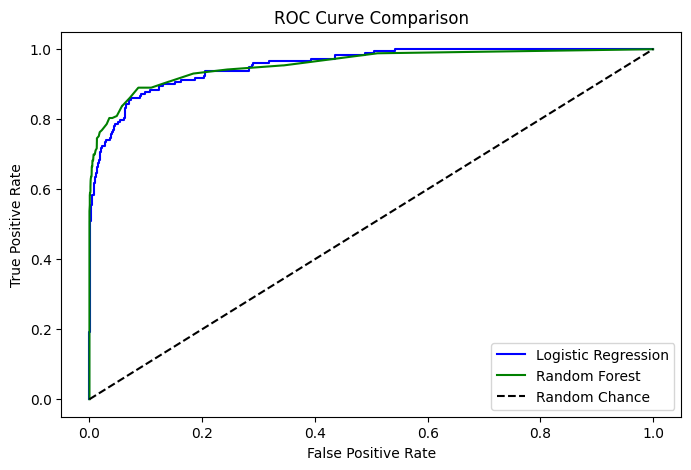

Logistic Regression AUC: 0.9549666309393785
Random Forest AUC: 0.9565658658884798

Best Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.9662984976880108


In [2]:
# Day 7: Model Evaluation & Hyperparameter Tuning

import pandas as pd
import re
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# --- Step 1: Load dataset ---
df = pd.read_csv('fake_job_postings.csv')

# --- Step 2: Check for 'clean_description', if missing -> clean the text ---
def clean_text(text):
    text = str(text).lower()                      # lowercase
    text = re.sub(r'<.*?>', ' ', text)            # remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)          # remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text).strip()      # remove extra spaces
    return text

if 'clean_description' not in df.columns:
    print("🧹 Cleaning 'description' column...")
    df['clean_description'] = df['description'].fillna('').apply(clean_text)

# Drop rows with empty descriptions
df = df.dropna(subset=['clean_description'])
df = df[df['clean_description'].str.strip() != ""]

# --- Step 3: TF-IDF Vectorization ---
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['clean_description'])
y = df['fraudulent']

# --- Step 4: Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Step 5: Initialize models ---
log_reg = LogisticRegression(max_iter=200, random_state=42)
rf = RandomForestClassifier(random_state=42)

# --- Step 6: 5-Fold Cross Validation ---
log_cv = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
rf_cv = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

print("Logistic Regression CV Accuracy:", log_cv.mean())
print("Random Forest CV Accuracy:", rf_cv.mean())

# --- Step 7: Fit Models ---
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)

# --- Step 8: ROC-AUC Comparison ---
y_prob_log = log_reg.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

fpr1, tpr1, _ = roc_curve(y_test, y_prob_log)
fpr2, tpr2, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8,5))
plt.plot(fpr1, tpr1, label="Logistic Regression", color='blue')
plt.plot(fpr2, tpr2, label="Random Forest", color='green')
plt.plot([0,1], [0,1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

print("Logistic Regression AUC:", roc_auc_score(y_test, y_prob_log))
print("Random Forest AUC:", roc_auc_score(y_test, y_prob_rf))

# --- Step 9: Hyperparameter Tuning (Random Forest) ---
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("\nBest Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)


Logistic Regression - Mean: 0.9633 Variance: 0.002
Decision Tree - Mean: 0.9603 Variance: 0.0041
Random Forest - Mean: 0.9757 Variance: 0.0033


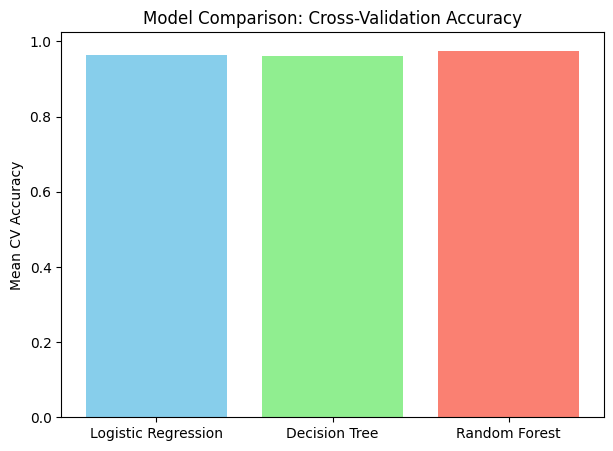

In [4]:
# 🧩 Task 1: Cross-Validation Analysis
# ------------------------------

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Initialize models
log_reg = LogisticRegression(max_iter=200, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
log_cv = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
dt_cv = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
rf_cv = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

# Display mean and variance
print("Logistic Regression - Mean:", round(log_cv.mean(), 4), "Variance:", round(log_cv.std(), 4))
print("Decision Tree - Mean:", round(dt_cv.mean(), 4), "Variance:", round(dt_cv.std(), 4))
print("Random Forest - Mean:", round(rf_cv.mean(), 4), "Variance:", round(rf_cv.std(), 4))

# Bar Chart for comparison
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
means = [log_cv.mean(), dt_cv.mean(), rf_cv.mean()]

plt.figure(figsize=(7,5))
plt.bar(models, means, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Mean CV Accuracy')
plt.title('Model Comparison: Cross-Validation Accuracy')
plt.show()


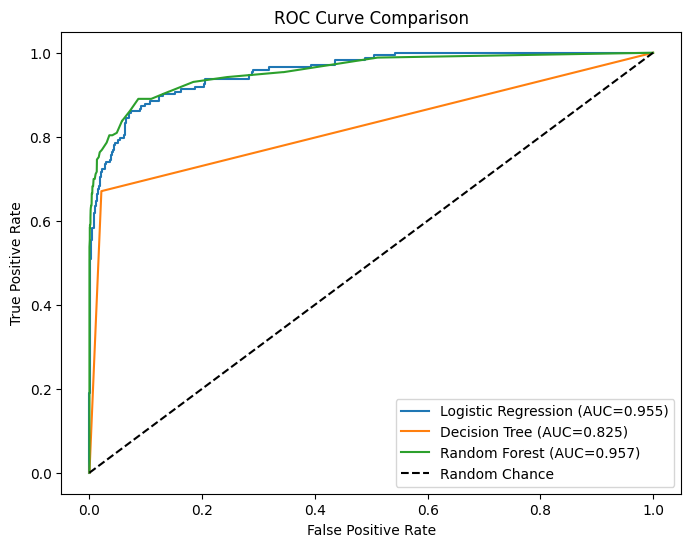

In [5]:
# ------------------------------
# 🧩 Task 2: ROC-AUC Visualization
# ------------------------------

# Initialize models
log_reg = LogisticRegression(max_iter=200, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Fit models
log_reg.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predict probabilities
y_prob_log = log_reg.predict_proba(X_test)[:, 1]
y_prob_dt = dt.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Compute ROC curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Plot ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC={roc_auc_score(y_test, y_prob_log):.3f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC={roc_auc_score(y_test, y_prob_dt):.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={roc_auc_score(y_test, y_prob_rf):.3f})")
plt.plot([0,1], [0,1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


In [8]:
# ------------------------------
# 🧩 Task 3: Hyperparameter Tuning (Decision Tree)
# ------------------------------

# Initialize base models
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Define parameter grid for tuning Decision Tree
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}

# Perform Grid Search
grid_dt = GridSearchCV(dt, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

# Display best parameters and score
print("Best Parameters for Decision Tree:", grid_dt.best_params_)
print("Best Cross-Validation Accuracy:", round(grid_dt.best_score_, 4))

# Evaluate tuned Decision Tree on test data
best_dt = grid_dt.best_estimator_
tuned_dt_acc = best_dt.score(X_test, y_test)
rf.fit(X_train, y_train)
rf_acc = rf.score(X_test, y_test)

print("\nTuned Decision Tree Accuracy:", round(tuned_dt_acc, 4))
print("Random Forest Accuracy:", round(rf_acc, 4))


Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.966

Tuned Decision Tree Accuracy: 0.9715
Random Forest Accuracy: 0.9787
